In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

from scipy import stats
#pd.set_option('display.max_rows', None)
#pd.reset_option('^display.', silent=True)

In [2]:
df = pd.read_csv('Airbnb_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df_filter = df.dropna()
df_outlier = df_filter[['price','minimum_nights', 'availability_365', 'reviews_per_month',
              'number_of_reviews','calculated_host_listings_count']]
filtered = (np.abs(stats.zscore(df_outlier)) < 3).all(axis=1)
df_filter = df_filter[filtered]

In [4]:
# drop nas in terms of price
df_dp = df.dropna(subset = ['price'])
# filter the outlier of price
filtered1 = (np.abs(stats.zscore(df_dp.price)) < 3)
# get the filtered data
df_dp = df_dp[filtered1]
df_dp

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#### Counts for five neighborhood groups

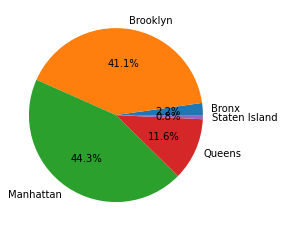

In [5]:
count = df.groupby('neighbourhood_group').agg('count').reset_index()[['neighbourhood_group', 'neighbourhood']]
fig1, ax1 = plt.subplots()
ax1.pie(count.neighbourhood, labels=count.neighbourhood_group, autopct='%1.1f%%')
plt.show()

#### Price

In [6]:
# drop nas in terms of price
df_map = df.dropna(subset = ['price'])
# filter the outlier of price
filtered1 = (np.abs(stats.zscore(df_map.price)) < 3)
# get the filtered data
data = df_map[filtered1]


data = data.sample(2000)

# make map
m = folium.Map(location=[40.80902, -73.95976], zoom_start=1)

# Get longitude, latitude and price
for lat, lon, price in zip(data['latitude'], data['longitude'], data['price']):
    folium.Marker(
        location=[lat, lon],
        popup='Price: ' + str(price),
        icon=None
    ).add_child(folium.Popup('Price: ' + str(price))).add_to(m)

m.save('price_Map.html')

[Text(0.5, 1.0, 'Distribution of Price for three room types')]

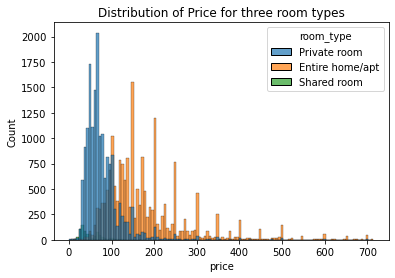

In [7]:
sns.histplot(data=df_filter, x="price", hue = "room_type",alpha = 0.7).set(
    title = "Distribution of Price for three room types")

[Text(0.5, 1.0, 'Distribution of Price for shared rooms')]

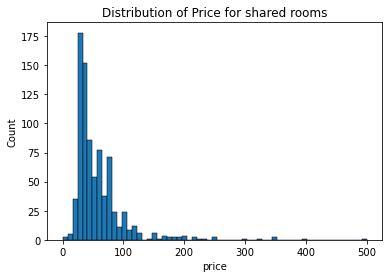

In [8]:
# shared room
df_shared = df_filter[df_filter.room_type == 'Shared room']
sns.histplot(data=df_shared, x="price", alpha=1).set(title = "Distribution of Price for shared rooms")

#### Number of host

In [9]:
# filter price
host = df.dropna(subset = ['calculated_host_listings_count', 'price'])
filtered_host = (np.abs(stats.zscore(host.price)) < 3)
host = host[filtered_host]

In [10]:
np.unique(host.calculated_host_listings_count)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  23,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  37,  39,  43,  47,  49,  50,  52,
        65,  87,  91,  96, 103, 121, 232, 327])

In [11]:
# make a datast with latitude and longitutde of top tours
d = {'Name': ['Statue of Liberty','Empire State Building','Central Park','Time Square','Brooklyn Bridge',
             'Fifth Avenue', 'Rockefeller Center', 'Grand Central Terminal', 'High Line', 'September 11 Memorial'],
     'Lat': [40.6892, 40.7484, 40.785091,40.758896, 40.7061, 
             40.773998, 40.7587, 40.753479, 40.7480, 40.7115],
     'Long': [-74.0445, -73.9857, -73.968285, -73.985130, -73.9969, 
              -73.966003, -73.9787, -73.980881, -74.0048, -74.0124]}
df_tour = pd.DataFrame(data=d)

<AxesSubplot:title={'center':'Price in Manhattan'}, xlabel='longitude', ylabel='latitude'>

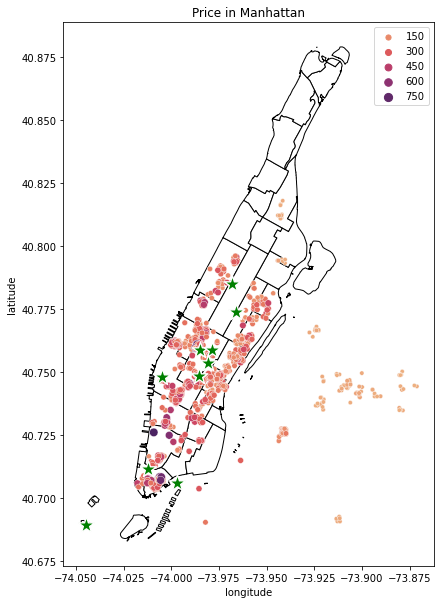

In [12]:
a = gpd.read_file("nyc_neighborhoods.geojson")
a = a[(a.boro_name == "Manhattan")]
fig,ax = plt.subplots(1,1, figsize=(10,10))
nyc_base = a.plot(color='w', edgecolor='black', ax=ax)

total = host[(host.calculated_host_listings_count > 50)]
g = sns.color_palette("flare", as_cmap=True)
sns.scatterplot(ax = nyc_base, x='longitude', y='latitude', hue='price', size = 'price',
                palette = g, data=total, alpha = 1).set(title = 'Price in Manhattan')
sns.scatterplot(ax = nyc_base, x='Long', y='Lat', data=df_tour, marker = '*', s=300, color="g")

[Text(0.5, 1.0, 'Availability in Manhattan')]

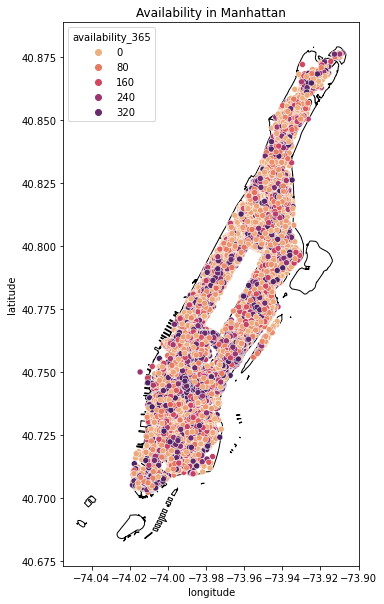

In [13]:
a = gpd.read_file("nyc_neighborhoods.geojson")
a = a[(a.boro_name == "Manhattan")]
fig,ax = plt.subplots(1,1, figsize=(10,10))
nyc_base = a.plot(color='w', edgecolor='black', ax=ax)

df_man = df[df.neighbourhood_group == "Manhattan"]
g = sns.color_palette("flare", as_cmap=True)
sns.scatterplot(ax = nyc_base, x='longitude', y='latitude', hue='availability_365',
                palette = g, data=df_man, alpha = 1).set(title = "Availability in Manhattan")

<AxesSubplot:title={'center':'Availability from large hosts'}, xlabel='longitude', ylabel='latitude'>

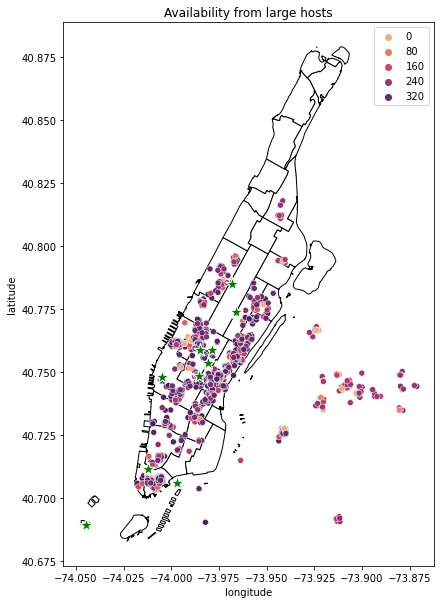

In [14]:
a = gpd.read_file("nyc_neighborhoods.geojson")
a = a[(a.boro_name == "Manhattan")]
fig,ax = plt.subplots(1,1, figsize=(10,10))
nyc_base = a.plot(color='w', edgecolor='black', ax=ax)

total = df[(df.calculated_host_listings_count > 50)]
g = sns.color_palette("flare", as_cmap=True)
sns.scatterplot(ax = nyc_base, x='longitude', y='latitude', hue='availability_365',
                palette = g, data=total, alpha = 1).set(title = "Availability from large hosts")
sns.scatterplot(ax = nyc_base, x='Long', y='Lat', data=df_tour, marker = '*', s=200, color="g")

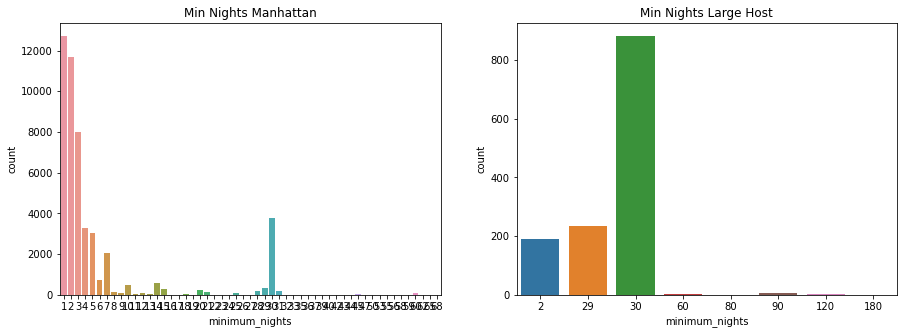

In [15]:
# remove outlier of minimum_nights
df_man = df.dropna(subset = ['minimum_nights'])
filtered = (np.abs(stats.zscore(df_man.minimum_nights)) < 3)
df_man = df_man[filtered]

fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), ncols=2)
sns.countplot(x="minimum_nights", data=df_man, ax = ax1).set(title = "Min Nights Manhattan")
sns.countplot(x="minimum_nights", data=total, ax = ax2).set(title = "Min Nights Large Host")
plt.show()

#### Analysis of the rent data

In [16]:
df_rent = pd.read_csv("medianAskingRent_All.csv")

In [17]:
sum19 = df_rent.iloc[:, 111:123]
sum20 = df_rent.iloc[:, 123:135]
df_rent['median19'] = sum19.median(axis = 1)
df_rent['median20'] = sum20.median(axis = 1)

In [18]:
price_median = pd.DataFrame(df.groupby('neighbourhood').median().price)
price_median = price_median.reset_index()

In [19]:
df_rent1 = df_rent.iloc[:,[0,138,139]]
df_rent1 = df_rent1.rename(columns={"areaName": "neighbourhood"})

In [20]:
price_median = price_median.merge(df_rent1, how='left', on='neighbourhood')
price_median1 = price_median.dropna(subset = ['median19','median20'])
price_median1['rent19'] = price_median1.median19 / 20
price_median1['rent20'] = price_median1.median20 / 20

/var/folders/sn/9mxsgntj2cg9kkc980lm7wb00000gn/T/ipykernel_48568/1754594043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_median1['rent19'] = price_median1.median19 / 20
/var/folders/sn/9mxsgntj2cg9kkc980lm7wb00000gn/T/ipykernel_48568/1754594043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_median1['rent20'] = price_median1.median20 / 20


[Text(0.5, 1.0, 'Airbnb Price & Rent in 2019 NYC')]

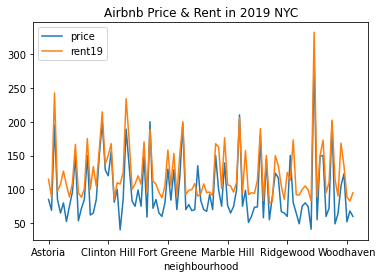

In [21]:
price_median1.plot(x = "neighbourhood", y=["price", "rent19"]).set(title = "Airbnb Price & Rent in 2019 NYC")

<AxesSubplot:>

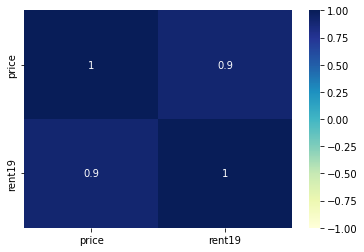

In [22]:
price_median2 = price_median1[['price','rent19']]
cor_mat = price_median2.corr()
sns.heatmap(cor_mat,vmin = -1, vmax = 1, cmap="YlGnBu",annot=True)

[Text(0.5, 1.0, 'Room types in neighborhood groups')]

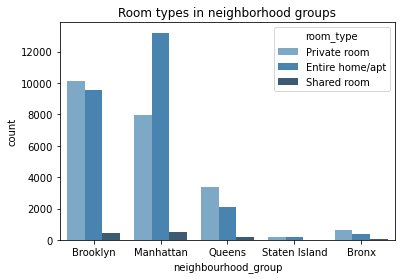

In [23]:
sns.countplot(x="neighbourhood_group", hue = "room_type", data=df, palette="Blues_d").set(
    title = "Room types in neighborhood groups")

In [24]:
rents = pd.DataFrame(df_rent.groupby(['Borough']).median().median19).reset_index()
rents

,Borough,median19
0,Bronx,1824.75
1,Brooklyn,2450.00
2,Manhattan,3500.00
3,Queens,1999.25
4,Staten Island,2022.50


In [25]:
df = pd.read_csv('Airbnb_NYC_2019.csv')
df21 = pd.read_csv('listings_Jan2021.csv')

TypeError: annotate() missing 1 required positional argument: 'text'

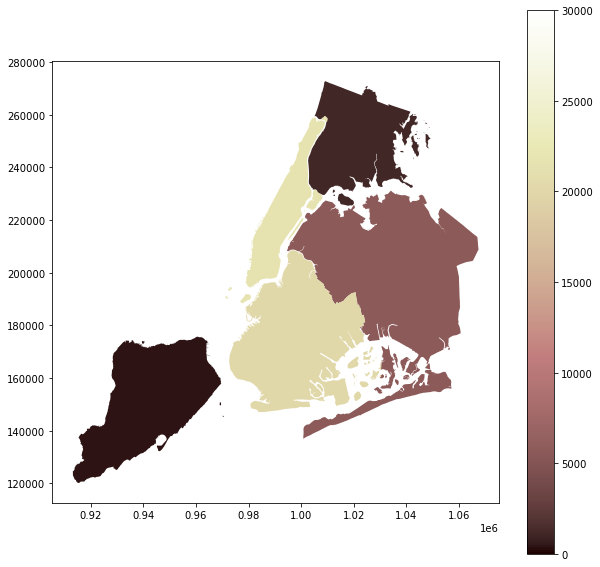

In [26]:
###B: Analysis with Airbnb Data in January 2021
# Number of Airbnbs by Neighbourhood Group in NYC 2019
nyc_map = gpd.read_file(gpd.datasets.get_path('nybb'))
neighbourhood_group_count = df.groupby('neighbourhood_group').agg('count').reset_index()
neighbourhood_group_count = neighbourhood_group_count[["neighbourhood_group", "id"]]
nyc_map.rename(columns={'BoroName':'neighbourhood_group'}, inplace=True)
nyc_merged = nyc_map.merge(neighbourhood_group_count, on='neighbourhood_group')
fig,ax = plt.subplots(1,1, figsize=(10,10))
nyc_merged.plot(column='id',cmap='pink', vmin=0, vmax=30000, ax=ax, legend=True)

nyc_merged.apply(lambda x: ax.annotate(s=x.neighbourhood_group, color='white', xy=x.geometry.centroid.coords[0]), axis=1)
plt.title("Number of Airbnbs by Neighbourhood Group in NYC 2019")
plt.axis('off')

TypeError: annotate() missing 1 required positional argument: 'text'

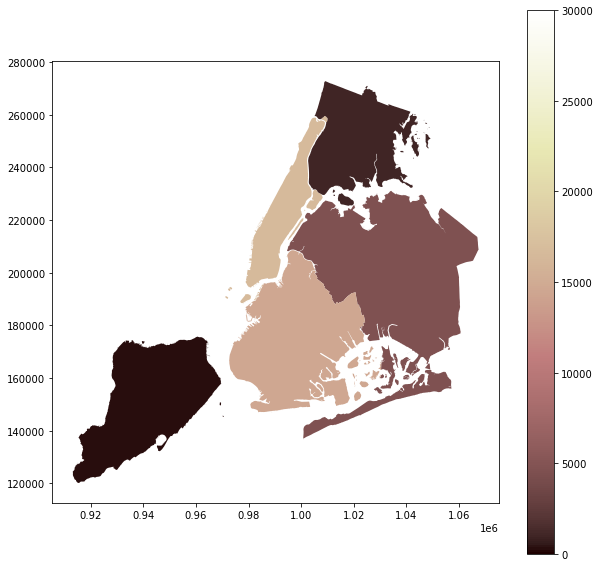

In [27]:
# 2021
nyc_map = gpd.read_file(gpd.datasets.get_path('nybb'))
neighbourhood_group_count21 = df21.groupby('neighbourhood_group').agg('count').reset_index()
neighbourhood_group_count21 = neighbourhood_group_count21[["neighbourhood_group", "id"]]
nyc_map.rename(columns={'BoroName':'neighbourhood_group'}, inplace=True)
nyc_merged21 = nyc_map.merge(neighbourhood_group_count21, on='neighbourhood_group')
fig,ax = plt.subplots(1,1, figsize=(10,10))
nyc_merged21.plot(column='id',  cmap='pink',vmin=0, vmax=30000,ax=ax, legend=True)

nyc_merged21.apply(lambda x: ax.annotate(s=x.neighbourhood_group, color='white', xy=x.geometry.centroid.coords[0]), axis=1)
plt.title("Number of Airbnbs by Neighbourhood Group in NYC 2021")
plt.axis('off')

TypeError: annotate() missing 1 required positional argument: 'text'

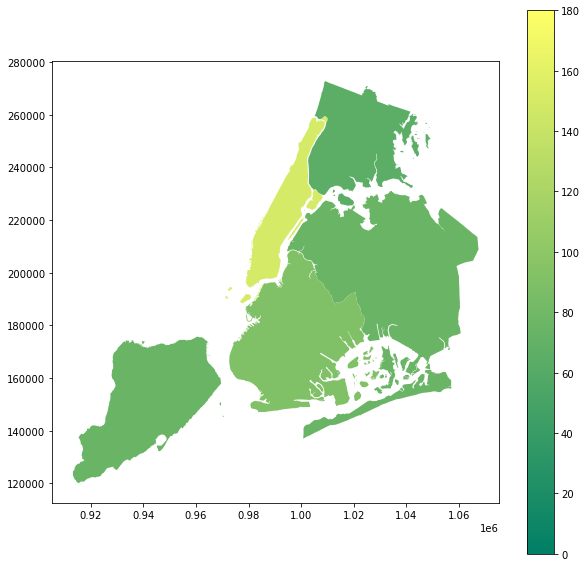

In [28]:
# Median Price of Airbnbs by Neighbourhood Group in NYC 2019
neighbourhood_group_median = df.groupby('neighbourhood_group').agg({'price': 'median'}).reset_index()
nyc_map.rename(columns={'BoroName':'neighbourhood_group'}, inplace=True)
nyc_merged = nyc_map.merge(neighbourhood_group_median, on='neighbourhood_group')
fig,ax = plt.subplots(1,1, figsize=(10,10))
nyc_merged.plot(column='price',  cmap='summer',vmin=0, vmax=180, ax=ax, legend=True)

nyc_merged.apply(lambda x: ax.annotate(s=x.neighbourhood_group, color='white', xy=x.geometry.centroid.coords[0]), axis=1)
plt.title("Median Price of Airbnbs by Neighbourhood Group in NYC 2019")
plt.axis('off')

TypeError: annotate() missing 1 required positional argument: 'text'

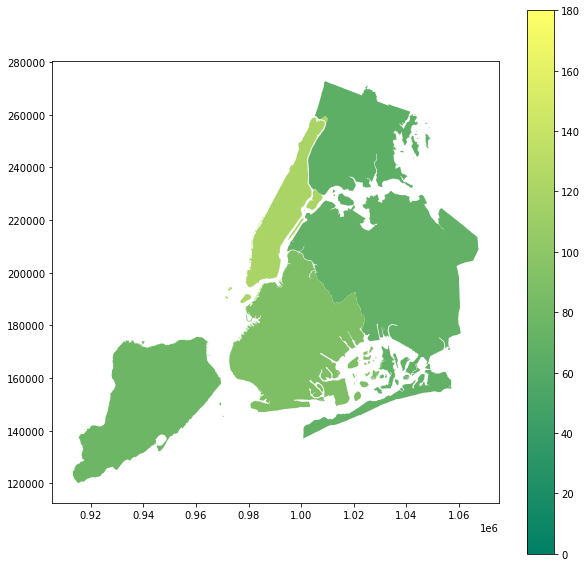

In [29]:
# 2021
neighbourhood_group_median21 = df21.groupby('neighbourhood_group').agg({'price': 'median'}).reset_index()
nyc_merged21 = nyc_map.merge(neighbourhood_group_median21, on='neighbourhood_group')
fig,ax = plt.subplots(1,1, figsize=(10,10))
nyc_merged21.plot(column='price',  cmap='summer',vmin=0, vmax=180,ax=ax, legend=True)

nyc_merged21.apply(lambda x: ax.annotate(s=x.neighbourhood_group, color='white', xy=x.geometry.centroid.coords[0]), axis=1)
plt.title("Median Price of Airbnbs by Neighbourhood Group in NYC 2021")
plt.axis('off')

In [30]:
# for tables  to find the median and count
def find_price_combine(df, df21):
    price_21 = df21.groupby('neighbourhood_group').agg({'price': ['median', 'sum']})
    price_21.rename(columns = {"neighbourhood_group": "neighbourhood_group", 
                               "price": "", "median": "median_2021", "sum": "sum_2021"}, inplace=True)

    price_19 = df.groupby('neighbourhood_group').agg({'price': ['median', 'sum']})
    price_19.rename(columns = {"neighbourhood_group": "neighbourhood_group", 
                               "price": "", "median": "median_2019", "sum": "sum_2019"}, inplace=True)

    number_21 = df21.groupby('neighbourhood_group').agg("count").reset_index()
    number_21 = number_21[["neighbourhood_group", "id"]]
    number_21.rename(columns = {"id": "number_of_housing_2021"}, inplace=True)

    number_19 = df.groupby('neighbourhood_group').agg("count").reset_index()
    number_19 = number_19[["neighbourhood_group", "id"]]
    number_19.rename(columns = {"id": "number_of_housing_2019"}, inplace=True)   

    price_combine = price_19.merge(price_21, on='neighbourhood_group')
    price_combine.columns = price_combine.columns.droplevel()
    price_combine = price_combine.merge(number_19, on='neighbourhood_group')
    price_combine = price_combine.merge(number_21, on='neighbourhood_group')
    return price_combine

In [31]:
# for tables to find the differene between 2021 and 2019
def find_price_different(price_combine):
    diff_combine = pd.DataFrame(data = price_combine.neighbourhood_group)
    diff_combine["median"] = price_combine.median_2021 - price_combine.median_2019
    diff_combine["total_price"] = price_combine.sum_2021 - price_combine.sum_2019
    diff_combine["total_price_percentage"] = diff_combine.total_price/price_combine.sum_2021
    diff_combine["number_of_housing"] = price_combine.number_of_housing_2021 - price_combine.number_of_housing_2019
    diff_combine["number_of_housing_percentage"] = diff_combine.number_of_housing/price_combine.number_of_housing_2021
    diff_combine.loc['Average_of_all']= diff_combine.mean()
    return diff_combine

In [32]:
price_combine = find_price_combine(df, df21)
diff_combine = find_price_different(price_combine)
diff_combine

/var/folders/sn/9mxsgntj2cg9kkc980lm7wb00000gn/T/ipykernel_48568/3786709789.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diff_combine.loc['Average_of_all']= diff_combine.mean()


,neighbourhood_group,median,total_price,total_price_percentage,number_of_housing,number_of_housing_percentage
0,Bronx,1.5,-3847.0,-0.041992,-119.0,-0.122428
1,Brooklyn,-1.0,-765185.0,-0.440923,-5500.0,-0.376609
2,Manhattan,-30.0,-1257087.0,-0.417992,-5061.0,-0.304880
3,Queens,-6.0,-92417.0,-0.196027,-990.0,-0.211719
4,Staten Island,1.0,-10888.0,-0.340921,-82.0,-0.281787
Average_of_all,NaN,-6.9,-425884.8,-0.287571,-2350.4,-0.259485


In [33]:
def remove_outliers_price(df):
    df_dp = df.dropna(subset = ['price'])
    # filter the outlier of price
    filtered1 = (np.abs(stats.zscore(df_dp.price)) < 3)
    # get the filtered data
    df_filter1 = df_dp[filtered1]
    
    return df_filter1

price_combine_no_outliers = find_price_combine(remove_outliers_price(df), remove_outliers_price(df21))
diff_combine_no_outliers = find_price_different(price_combine_no_outliers)
diff_combine_no_outliers

/var/folders/sn/9mxsgntj2cg9kkc980lm7wb00000gn/T/ipykernel_48568/3786709789.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diff_combine.loc['Average_of_all']= diff_combine.mean()


,neighbourhood_group,median,total_price,total_price_percentage,number_of_housing,number_of_housing_percentage
0,Bronx,1.0,-3751.0,-0.042524,-119.0,-0.122680
1,Brooklyn,-1.0,-713587.0,-0.440695,-5483.0,-0.377175
2,Manhattan,-29.0,-1217898.0,-0.483244,-5000.0,-0.305288
3,Queens,-6.0,-116792.0,-0.281494,-994.0,-0.213488
4,Staten Island,1.0,-4838.0,-0.157400,-80.0,-0.275862
Average_of_all,NaN,-6.8,-411373.2,-0.281072,-2335.2,-0.258899


In [34]:
# calculate the true revenue in NYC
true_diff = price_combine_no_outliers.sum_2021 * 0.55 - price_combine_no_outliers.sum_2019 * 0.7072
sum(true_diff)

-2189263.1112